Nota: texto sin ancetos 

En este cuaderno aprenderas como explorar la base de datos [ESMAtlas](https://esmatlas.com/), descargar los resultados, procesarlos y agrupar estructuras de proteinas. 


Autor: Miguel Angel Gonzalez Arias (AKA GAMA | @miangoar en [Twitter](https://twitter.com/miangoar) y [Github](https://github.com/miangoar))


In [1]:
#@markdown Para correr este cuaderno debemos instalar [conda-colab](https://inside-machinelearning.com/en/how-to-install-use-conda-on-google-colab/) para instalar otras librerias. Se reiniciara el entorno de colab, no te preocupes.

#@markdown  Si haces doble click en estas celdas que tienen un boton de play y solo texto, encontraras el codigo que se esta ejecutando, pero que para una mejor vizualizacion, lo oculte. 
! pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:26
🔁 Restarting kernel...


In [1]:
#@markdown Instala Foldseek, TMaling y py3Dmol para analizar la informacion de las estructruas proteicas. Ademas, importa varias liberiras clasicas de python (pd, np, json, os, re, tqdm, subproces, sns, plt)

# instalacion de libs para proteinas
! conda install -y -q -c conda-forge -c bioconda foldseek
! conda install -y -q -c bioconda tmalign
! pip install -q py3Dmol

# manipulacion de datos
import pandas as pd 
import numpy as np
import json
import os 
from tqdm import tqdm
import subprocess
import re

# visualizacion de datos 
import seaborn as sns
import matplotlib.pyplot as plt
import py3Dmol



Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - foldseek


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aria2-1.36.0               |       h1e4e653_3         1.8 MB  conda-forge
    ca-certificates-2022.12.7  |       ha878542_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    colorama-0.4.6             |     pyhd8ed1ab_0          25 KB  conda-forge
    conda-22.11.1              |   py38h578d9bd_1         905 KB  conda-forge
    foldseek-4.645b789         | pl5321hf1761c0_0         5.9 MB  bioconda
    gawk-5.1.0                 |       h7f98852_0         1.4 MB  conda-forge
    gettext-0.21.1             |       h27087fc_0         4.1 MB  conda-forge
    libidn2-2.3.4              |       h166bdaf_0         157 KB  conda-forge
    libunistring-0

Trabajaremos con el cristal de una betalactamasa clase A llamada TEM-1 ([PDB: 1zg4](https://www.rcsb.org/structure/1zg4)), la cual es una enzima responsable de resistencia contra antibioticos y ademas, es un modelo de estudio en evolucion de proteinas.  

Sube tu cristal al webserver de [ESMAtlas](https://esmatlas.com/resources?action=search_structure). En este servicio se usa un sub-conjunto de las ~617 millones de predicciones estructruales, llamado [highquality_clust30](https://github.com/facebookresearch/esm/blob/main/scripts/atlas/README.md) que fue contruido al tomar las secuencias de la base de datos MGnify90 (i.e. la base de datos MGnify clusterizada a 90% de identidad de secuencia) y solo conservando aquellas predicciones confiables (i.e. con valores >0.7 de pTM y pLDDT).

Una vez has cargado tu estructrua, ESMAtlas usara Foldseek para encontrar otras estructruas similares en la base de datos. Los resultados de la busqueda pueden tomar un par de minutos y estaran disponibles para descargarse al clickar en "Download results", el cual los descargara en formato .json. Renombra este archivo como "esm_atlas_results" para que podamos trabajar con el en las siguientes celdas.

Para facilitar el proceso, puedes descargar un archivo de ejemplo con los resultados desde el lisguiente link:
https://github.com/miangoar/ciencia-de-proteinas-basada-en-IA/blob/main/data/esm_atlas_results.json



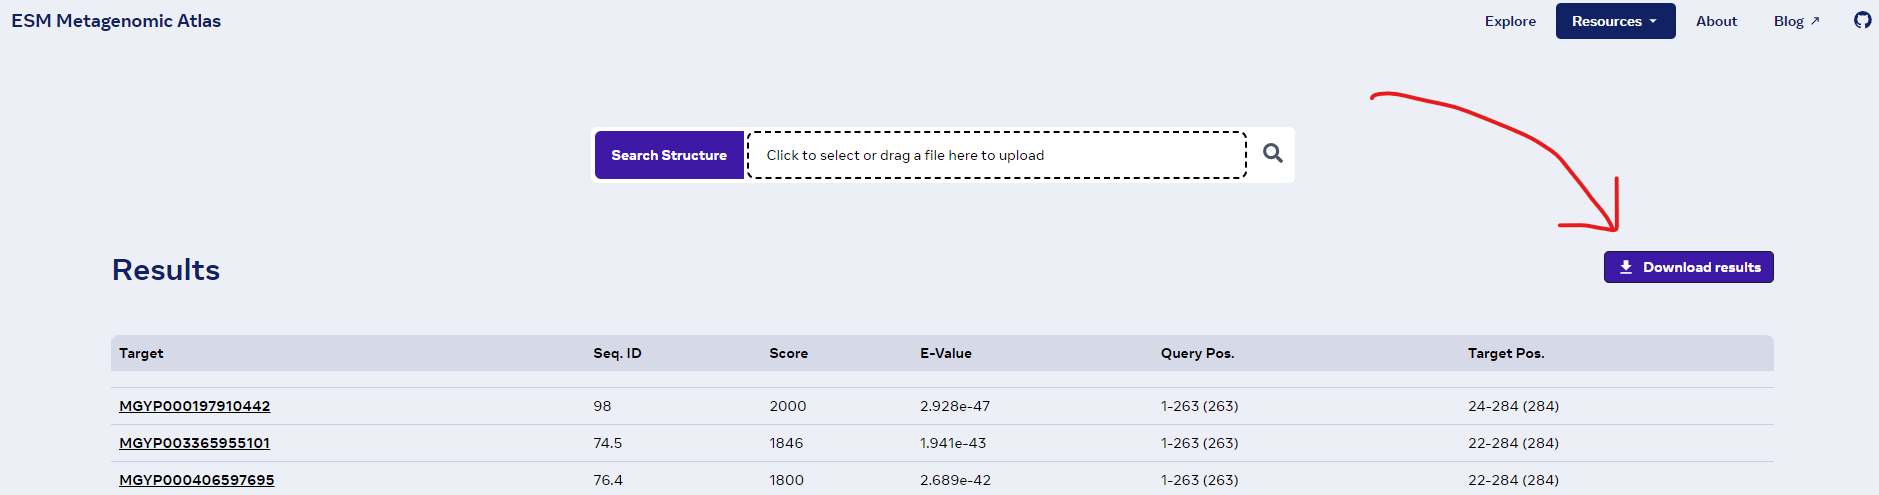


 Los resultados del "blasteo" estructrual lucen de la siguiente forma: 

```markdown 
# Ejemplo de resultados del blasteo estructrual
[
  {
    "db":"highquality_clust30",
    "alignments":
      [
       {
         "query":"my_PDB.pdb",
         "target":"MGYP000740062793.pdb.gz",
         "seqId":54
         "alnLength":261,
         "missmatches":115,
         "gapsopened":4,
         "qStartPos":2,
         "qEndPos":257,
         "dbStartPos":43,
         "dbEndPos":303,
         "eval":6.804e-37,
         "score":1473,
         "qLen":263,
         "dbLen":307,
         "tSeq":"MNQLII ..."},
       {
         "query":"my_PDB.pdb",
         "target":"MGYP000931547452.pdb.gz",
         "seqId":50.7,
         "alnLength":260,
         "missmatches":122,
         "gapsopened":4,
         "qStartPos":1,
         "qEndPos":257,
         "dbStartPos":26,
         "dbEndPos":282,
         "eval":7.438e-34,
         "score":1359,
         "qLen":263,
         "dbLen":285,
         "tSeq":"MNHALKAPLARIGL ... "},
        {
          N_DICCIONARIOS_CON_DATOS_DISTINTOS}
          .
          .
          .
      ]
  }
]
```



En la parte superior izquierda de la interfaz de google colab, da click en el icono en forma de directorio para subir tus resultados de ESMAtlas en formato json. 

Se expandira la pestaña y apareceran 4 iconos junto con los datos almacenados en nuestro entorno de google colab. Al dejar el cursor sobre cada icono, aparecera una leyenda que explica su funcion. Pulsa el primer icono con un simbolo de documento con un flecha en el centro el cual sirve para cargar archivos al entorno de google colab.  

In [4]:
# Descargar el cristal 1zg4 como referencia 
! wget --no-verbose https://files.rcsb.org/view/1zg4.pdb . 

2023-02-11 00:18:26 URL:https://files.rcsb.org/view/1zg4.pdb [209790] -> "1zg4.pdb.1" [1]
wget: unable to resolve host address ‘.’
FINISHED --2023-02-11 00:18:26--
Total wall clock time: 0.7s
Downloaded: 1 files, 205K in 0.3s (656 KB/s)


In [29]:
# abrir y leer los resultados de ESMatlas
with open("esm_atlas_results.json", "r") as f:
    data = json.load(f)

# usa el metodo json_normalize de pandas para leer los datos de la 
# key "alignments" del diccionario completo
df = pd.json_normalize(data, record_path="alignments")
df

,query,target,seqId,alnLength,missmatches,gapsopened,qStartPos,qEndPos,dbStartPos,dbEndPos,eval,score,qLen,dbLen,tSeq
0,job.pdb,MGYP000197910442.pdb.gz,98.0,263,3,1,1,263,24,284,2.928000e-47,2000,263,284,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...
1,job.pdb,MGYP003365955101.pdb.gz,74.5,263,67,0,1,263,22,284,1.941000e-43,1846,263,284,MPRFRLTLISLLAACCLPALANPLTLNKVKEVEKELHARVGYAEIS...
2,job.pdb,MGYP000406597695.pdb.gz,76.4,263,62,0,1,263,22,284,2.689000e-42,1800,263,284,MSRFRLPLLSLLVAFCLPASAHPVTQETVKKAEDQLNARVGYAEVA...
3,job.pdb,MGYP000045266455.pdb.gz,66.5,263,88,0,1,263,58,320,8.288000e-41,1740,263,322,MMKEKRGIVNQQNAGLFLFVASLLAFIGPHSRMYVVMRYIRLCIIS...
4,job.pdb,MGYP000952547975.pdb.gz,63.8,260,94,0,4,263,26,285,1.443000e-39,1690,263,285,MKKIRLIIISLLAGMCTPALSTPVNVTDTIQSTEDHIKGRVGFTEI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,job.pdb,MGYP000270753499.pdb.gz,16.7,167,113,7,20,173,36,189,9.063000e-06,328,263,257,MSQFMYRVLAWITALVVSGGVVRTEAPVGPEISAPSAVLMEASTGQ...
996,job.pdb,MGYP003301483211.pdb.gz,14.3,216,171,9,5,214,2,209,1.016000e-05,326,263,210,SVLSYINANPGERISFRYVNLASNETLGINDLTPIIPAGAYALPAG...
997,job.pdb,MGYP000378968046.pdb.gz,15.7,171,134,3,20,187,37,200,1.431000e-05,320,263,253,MQFLKKFAILLLSFVITVLIVLYFYLYVNGPIIQAKSAILIDAHSG...
998,job.pdb,MGYP001555393514.pdb.gz,14.6,226,167,8,20,234,37,247,2.535000e-05,310,263,248,MQFFVSLFRKSLPVWLLLIAGLITTVAPLRAAHATEAHLLIEADTG...


In [30]:
# crea una nueva columna con los nombres de las proteinas sin la extencion .pdb.gz. 
# Esto servira para descargar las estructruas
df["name"] = df.target.str.replace(".pdb.gz", "")

# ordena el dataframe en funcion de la identidad de secuencia
df.sort_values("seqId")

<ipython-input-30-8dbe5a11476f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["name"] = df.target.str.replace(".pdb.gz", "")


,query,target,seqId,alnLength,missmatches,gapsopened,qStartPos,qEndPos,dbStartPos,dbEndPos,eval,score,qLen,dbLen,tSeq,name
962,job.pdb,MGYP001240559442.pdb.gz,8.1,281,191,13,10,259,27,271,3.490000e-07,385,263,380,MFKEIISLALAAMLTLPCALTSADPGAESAVFAGTKAVAVLESTCL...,MGYP001240559442
988,job.pdb,MGYP002624471280.pdb.gz,9.3,267,184,14,20,262,39,271,2.172000e-06,353,263,384,MNMRRFAALLLCCCMILSLLSMSASASAEGLPELYGVEAALLIDAV...,MGYP002624471280
963,job.pdb,MGYP000645319343.pdb.gz,9.7,278,184,13,13,258,43,285,3.695000e-07,384,263,311,MRKKWISIICAVIIMVCTIITPAYAAGIFLPEESNTKQAESTDLIE...,MGYP000645319343
786,job.pdb,MGYP002516775808.pdb.gz,10.0,290,204,14,3,259,85,350,2.380000e-08,432,263,493,MKQMKRWISAWTLAGVLMCTCLGPGVRTWGSEPVMVAGSGMAEAVW...,MGYP002516775808
619,job.pdb,MGYP000868756329.pdb.gz,10.0,317,208,13,8,263,129,429,1.219000e-09,484,263,429,MIKYLFLTTLLISKIIYAQSNFQVKADFLCSQIIENPNFKYEDYFS...,MGYP000868756329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,job.pdb,MGYP000045266455.pdb.gz,66.5,263,88,0,1,263,58,320,8.288000e-41,1740,263,322,MMKEKRGIVNQQNAGLFLFVASLLAFIGPHSRMYVVMRYIRLCIIS...,MGYP000045266455
1,job.pdb,MGYP003365955101.pdb.gz,74.5,263,67,0,1,263,22,284,1.941000e-43,1846,263,284,MPRFRLTLISLLAACCLPALANPLTLNKVKEVEKELHARVGYAEIS...,MGYP003365955101
2,job.pdb,MGYP000406597695.pdb.gz,76.4,263,62,0,1,263,22,284,2.689000e-42,1800,263,284,MSRFRLPLLSLLVAFCLPASAHPVTQETVKKAEDQLNARVGYAEVA...,MGYP000406597695
148,job.pdb,MGYP000284295739.pdb.gz,82.8,175,30,0,66,240,1,175,8.593000e-23,1014,263,175,LDRRIHYRQSDLVAYSPVTEKHITDGMTVGELCDAAITMSDNTAAN...,MGYP000284295739


Text(0.5, 1.0, 'ESMAtlas | n = 1000')

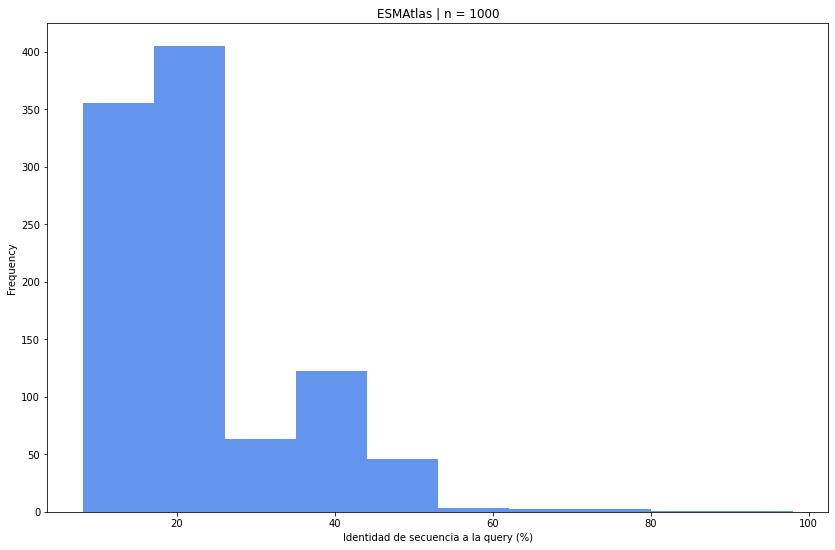

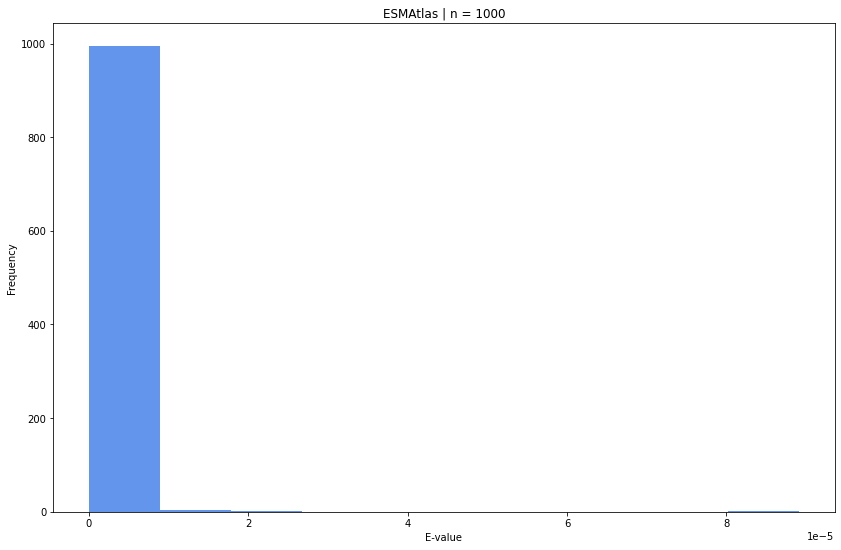

In [31]:
# inspecciona brevemente los datos 

# por porcentaje de identidad de seq
plt.figure(figsize = (14,9))
df.seqId.plot.hist(color = "cornflowerblue")
plt.xlabel("Identidad de secuencia a la query (%)")
plt.title(f"ESMAtlas | n = {len(df)}")

# o e-value
plt.figure(figsize = (14,9))
df["eval"].plot.hist(color = "cornflowerblue")
plt.xlabel("E-value")
plt.title(f"ESMAtlas | n = {len(df)}")

Es curioso que el target MGYP001240559442 comparta apenas un 8% de identidad de secuencia con nuesto cristal de referencia. Verifica las estructuras. Son homologas? 

In [32]:
# decarga la prediccion estructrual 
! wget -nv https://api.esmatlas.com/fetchPredictedStructure/MGYP001240559442.pdb .

2023-02-11 00:39:15 URL:https://api.esmatlas.com/fetchPredictedStructure/MGYP001240559442.pdb [222075/222075] -> "MGYP001240559442.pdb" [1]
wget: unable to resolve host address ‘.’
FINISHED --2023-02-11 00:39:15--
Total wall clock time: 1.9s
Downloaded: 1 files, 217K in 0.3s (851 KB/s)


In [33]:
# usa py3Dmol para ver el cristal directamente de la PDB
crystal = py3Dmol.view(query='pdb:1zg4')
crystal.setStyle({'cartoon': {'color':'spectrum'}})
crystal.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [34]:
# usa py3Dmol para leer el .pdb local de MGYP001240559442
with open('MGYP001240559442.pdb', 'r') as f:
    pdb = f.read()

# Crea una vista 3D de la proteína
view = py3Dmol.view()
view.addModel(pdb, 'pdb')
view.setStyle({'cartoon': {'color': 'spectrum'}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [35]:
# usa una comparacion vizual de ambas 
# lee ambos pdbs y asignalos a una variable cada uno
with open('MGYP001240559442.pdb', 'r') as f:
    pdb1 = f.read()
with open('1zg4.pdb', 'r') as f:
    pdb2 = f.read()

# genera la vizualizacion con grid de 1 fila 2 columnas
view = py3Dmol.view(linked=False, viewergrid=(1,2), width=1200, height=600)

# carga las estructruas en distintos paneles y
# colorea las estructrturas para distinguirlas
view.addModel(pdb1,'pdb',viewer=(0,0))
view.setStyle({'cartoon':{'color':'red'}},viewer=(0,0))

view.addModel(pdb2,'pdb',viewer=(0,1))
view.setStyle({'cartoon':{'color':'blue'}},viewer=(0,1))

# despliega las estructruas
view.zoomTo(viewer=(0,0))
view.zoomTo(viewer=(0,1))
view.render()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [36]:
# alinea las  estructruas con tmalign 
! TMalign MGYP001240559442.pdb 1zg4.pdb        


 **************************************************************************
 *                        TM-align (Version 20170708)                     *
 * An algorithm for protein structure alignment and comparison            *
 * Based on statistics:                                                   *
 *       0.0 < TM-score < 0.30, random structural similarity              *
 *       0.5 < TM-score < 1.00, in about the same fold                    *
 * Reference: Y Zhang and J Skolnick, Nucl Acids Res 33, 2302-9 (2005)    *
 * Please email your comments and suggestions to: zhng@umich.edu          *
 **************************************************************************

Name of Chain_1: MGYP001240559442.pdb                              
Name of Chain_2: 1zg4.pdb                                          
Length of Chain_1:  380 residues
Length of Chain_2:  263 residues

Aligned length=  227, RMSD=   3.36, Seq_ID=n_identical/n_aligned= 0.093
TM-score= 0.50429 (if normalized by len

Text(0.5, 1.0, 'muestreo aleatorio | n = 100')

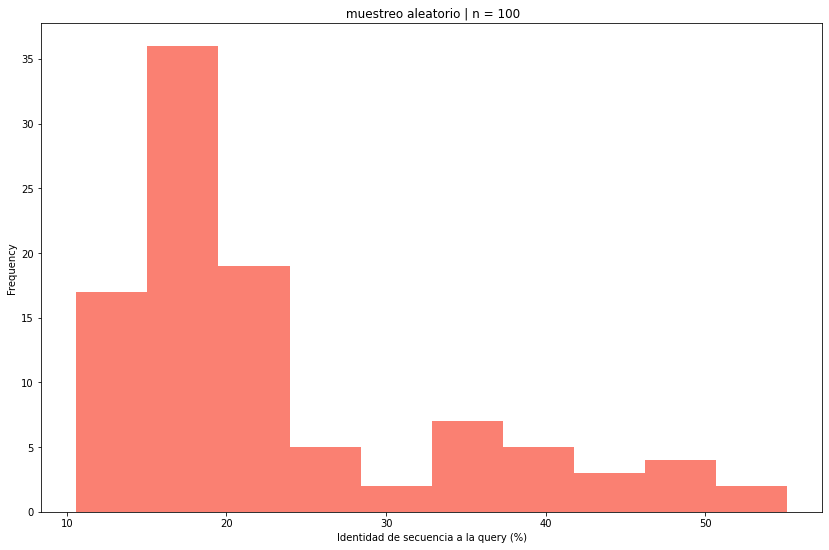

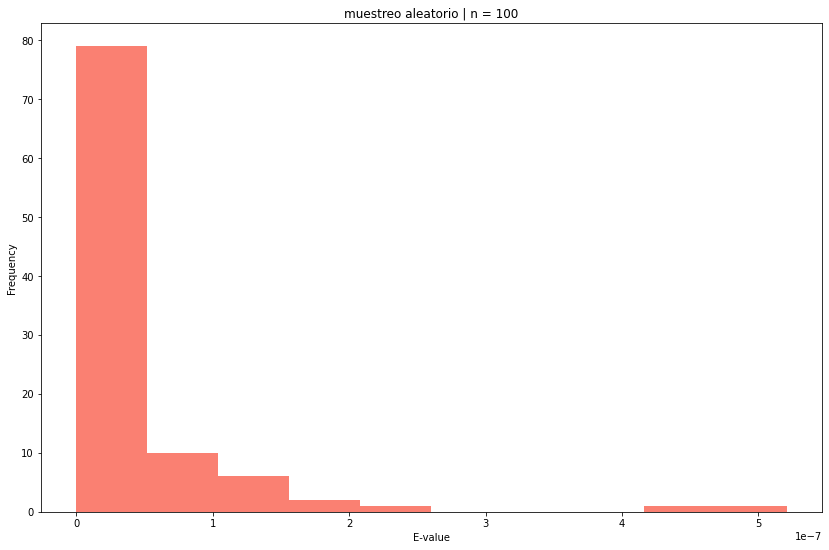

In [37]:
# realiza un submuestreo para no trabajar con las 100 estructruas
df2 = df.sample(100)

# inspecciona los datos
plt.figure(figsize = (14,9))
df2.seqId.plot.hist(color = "salmon")
plt.xlabel("Identidad de secuencia a la query (%)")
plt.title(f" muestreo aleatorio | n = {len(df2)}")

plt.figure(figsize = (14,9))
df2["eval"].plot.hist(color = "salmon")
plt.xlabel("E-value")
plt.title(f"muestreo aleatorio | n = {len(df2)}")

In [38]:
# crea un directorio donde almacenar los pdbs
! mkdir esm_atlas_proteins

# copia nuestra protein con baja identidad por si no sale muestreada
! cp MGYP001240559442.pdb esm_atlas_proteins

In [39]:
# crea un log que se imprima mientras se descargan los datos 
# puedes usar emojis en los jupyter notebooks para que se vea mas chido usando \N{nombre_del_emoji}
# https://www.quackit.com/character_sets/emoji/emoji_v3.0/unicode_emoji_v3.0_characters_all.cfm 
info = "\N{crab} \N{crab} \N{crab} Descargando proteinas desde el repositorio de ESMAtlas \N{crab} \N{crab} \N{crab} "

# descarga las proteinas iterando sobre la columna "name" del df2
for name in tqdm(df2['name'], desc = info):
    
    # crea la url con la pdb a descargar
    url = f"https://api.esmatlas.com/fetchPredictedStructure/{name}.pdb"
    
    # descarga el pdb
    os.system(f"wget {url} -O esm_atlas_proteins/{name}.pdb")

# verificacion
print("\n numero total de pdbs descargados:")
! ls -1 esm_atlas_proteins | wc -l 

🦀 🦀 🦀 Descargando proteinas desde el repositorio de ESMAtlas 🦀 🦀 🦀 : 100%|██████████| 100/100 [02:17<00:00,  1.37s/it]


 numero total de pdbs descargados:
101


In [40]:
# crea una base de datos de foldseeq para alienar las estructruas. Este tipo de programas necesita de este paso
# y crea distintos archivos con varias extenciones basados en el nombre del resultado que le des,
# en este caso "my_foldseek_db". La opcion "-v 1" es para pedir que no sea tan verboso el resultado
! foldseek createdb esm_atlas_proteins my_foldseek_db -v 1

# realiza el alineamiento contra el cristal de la TEM-1 (PDB: 1zg4) 
! foldseek easy-search 1zg4.pdb my_foldseek_db my_foldseek_results.m8 tmp -v 1

Removing temporary files


In [41]:
# el resultado del comando anterior es el archivo my_foldseek_results.m8, abrelo

# columnas por defecto en el fromato .m8 resultante 
column_names = ["query","target","fident","alnlen","mismatch","gapopen","qstart","qend","tstart","tend","evalue","bits"]

# crea un pandas df 
df_foldseek = pd.read_csv("my_foldseek_results.m8", sep = "\t", names=column_names)
df_foldseek.sort_values("fident")

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,evalue,bits
100,1zg4.pdb,MGYP001240559442.pdb,0.081,250,224,0,10,259,27,271,6.713000e-09,203
95,1zg4.pdb,MGYP000667042553.pdb,0.106,246,216,0,20,262,40,285,2.849000e-09,229
97,1zg4.pdb,MGYP000130307592.pdb,0.118,240,210,0,20,258,79,318,2.022000e-09,227
99,1zg4.pdb,MGYP002624396745.pdb,0.123,261,218,0,2,262,12,261,1.001000e-08,206
98,1zg4.pdb,MGYP003289666264.pdb,0.124,236,204,0,20,255,29,262,8.437000e-09,213
...,...,...,...,...,...,...,...,...,...,...,...,...
4,1zg4.pdb,MGYP000117448113.pdb,0.472,249,130,0,17,263,5,253,4.314000e-30,1106
2,1zg4.pdb,MGYP003571135627.pdb,0.484,261,133,0,3,261,42,302,8.178000e-34,1274
22,1zg4.pdb,MGYP000892715547.pdb,0.502,177,87,0,25,201,1,176,9.448000e-19,663
0,1zg4.pdb,MGYP003700413939.pdb,0.509,258,126,0,4,261,32,289,6.251000e-35,1334


In [42]:
# realiza el mismo blasteo estructrual, pero cambia el formato a uno interactivo en html
! foldseek easy-search 1zg4.pdb my_foldseek_db my_foldseek_results.html tmp --format-mode 3 -v 1

# descarga y abre el .html. Para ello, da click nuevamente en el icono de directorio y busca el archivo

Removing temporary files


In [43]:
# clusteriza las 100 estructruas. Para ello, tenemos que hacer un blasteo por pares 

! foldseek search my_foldseek_db my_foldseek_db my_foldseek_pairwise_results tmpFolder -c 0.8 -v 1 
! ls  my_foldseek_pairwise_results*

Removing temporary files
my_foldseek_pairwise_results.0	my_foldseek_pairwise_results.dbtype
my_foldseek_pairwise_results.1	my_foldseek_pairwise_results.index


In [44]:
# realiza la clusterizacion propiamente
! foldseek clust my_foldseek_db my_foldseek_pairwise_results my_foldseek_cluster_results -v 1

# da fromato a los resultados para exportarlos en forma de tabla
! foldseek createtsv my_foldseek_db my_foldseek_db my_foldseek_cluster_results my_foldseek_cluster_results.tsv -v 1 
! ls  my_foldseek_cluster_results*

my_foldseek_cluster_results	    my_foldseek_cluster_results.index
my_foldseek_cluster_results.dbtype  my_foldseek_cluster_results.tsv


El [formato del resultado](https://github.com/soedinglab/MMseqs2/wiki#cluster-tsv-format) cuenta con dos columnas:
1. Cluster representativo
2. Miembro del cluster

In [45]:
# lee la tabla como un pandas df y dale formato adecuado
df_clusters =  pd.read_csv("my_foldseek_cluster_results.tsv", sep = "\t", names=["cluster", "member"])
df_clusters.sort_values("cluster")

,cluster,member
0,MGYP000299948344.pdb,MGYP000299948344.pdb
1,MGYP000667042553.pdb,MGYP000667042553.pdb
2,MGYP000667042553.pdb,MGYP000668322076.pdb
3,MGYP000667042553.pdb,MGYP001045742678.pdb
4,MGYP000667042553.pdb,MGYP003295336285.pdb
...,...,...
93,MGYP003956178969.pdb,MGYP000535321787.pdb
92,MGYP003956178969.pdb,MGYP000261167385.pdb
99,MGYP003956178969.pdb,MGYP002784162668.pdb
94,MGYP003956178969.pdb,MGYP000916835807.pdb


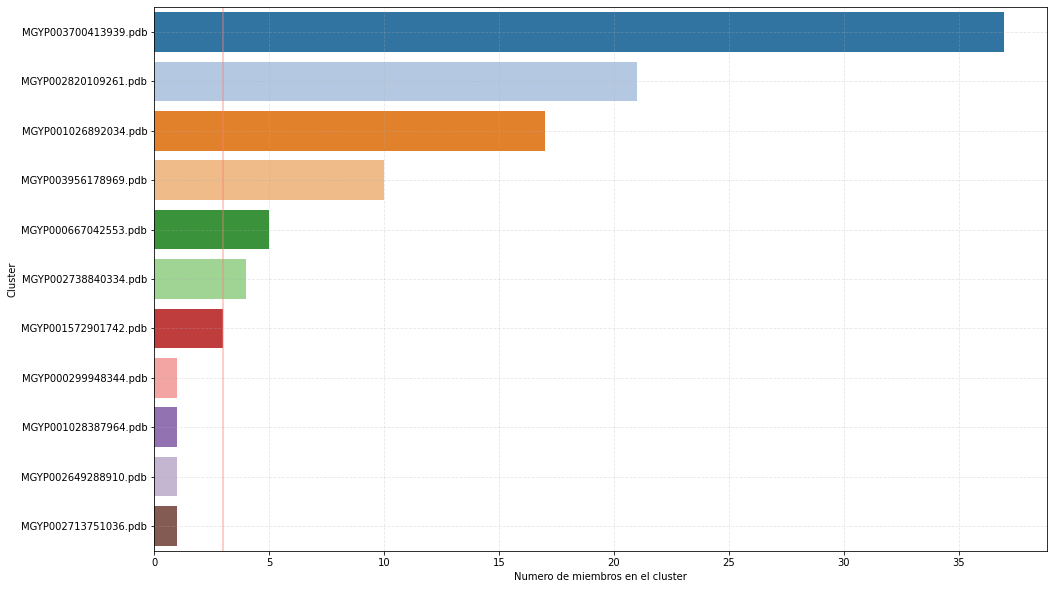

In [46]:
# grafica el df para ver el numero de miembros en cada cluster 
plt.figure(figsize = (16, 10)) 
sns.countplot(data = df_clusters, y = "cluster", order = pd.value_counts(df_clusters.cluster).index, palette="tab20")
plt.ylabel("Cluster")
plt.xlabel("Numero de miembros en el cluster")
plt.grid(alpha = 0.3, linestyle = "--")
plt.axvline(x = 3, color = 'salmon', alpha = 0.5)

In [47]:
# crea un nuevo df dando formato en fucnion del conteo de miembros
df_clust_counts = df_clusters.value_counts("cluster").to_frame().reset_index()
df_clust_counts = df_clust_counts.rename(columns={0:"count"})
df_clust_counts

,cluster,count
0,MGYP003700413939.pdb,37
1,MGYP002820109261.pdb,21
2,MGYP001026892034.pdb,17
3,MGYP003956178969.pdb,10
4,MGYP000667042553.pdb,5
5,MGYP002738840334.pdb,4
6,MGYP001572901742.pdb,3
7,MGYP000299948344.pdb,1
8,MGYP001028387964.pdb,1
9,MGYP002649288910.pdb,1


In [48]:
# exporta el nombre de los clusters 
df_clust_counts[["cluster"]].to_csv("cluster_names.csv", index = False, sep = "\t")

! cat cluster_names.csv

cluster
MGYP003700413939.pdb
MGYP002820109261.pdb
MGYP001026892034.pdb
MGYP003956178969.pdb
MGYP000667042553.pdb
MGYP002738840334.pdb
MGYP001572901742.pdb
MGYP000299948344.pdb
MGYP001028387964.pdb
MGYP002649288910.pdb
MGYP002713751036.pdb


In [49]:
# crea un directorio a donde copiar los clusters representativos 
! mkdir cluster_representatives

In [50]:
# copia todos los archivos que se encuentren en la lista al dir cluster_representatives

%%bash
# declara la lista con los nombres a buscar
file="cluster_names.csv"

# declara los dirs de origen y destino
src_dir="esm_atlas_proteins/"
dst_dir="cluster_representatives/"

# lee la lista con un ciclo while
while read line; do
 
  # checa si la linea tiene registro en el dir con las proteinas
  if [ -f "$src_dir$line" ]; then
    
    #  si tiene registro, copia el archivo
    cp "$src_dir$line" "$dst_dir"
  
  # fin del ciclo
  fi

done < $file

In [51]:
! ls cluster_representatives

MGYP000299948344.pdb  MGYP001572901742.pdb  MGYP002820109261.pdb
MGYP000667042553.pdb  MGYP002649288910.pdb  MGYP003700413939.pdb
MGYP001026892034.pdb  MGYP002713751036.pdb  MGYP003956178969.pdb
MGYP001028387964.pdb  MGYP002738840334.pdb


Ahora realizaremos un agrupacion por pares de estructruas con base en su rmsd, para ello usaremos TMalign. Ojo, no es recomendable correr esta pieza de codigo con muchas estructruas, pues el coste de computo escala al cuadrado.

In [52]:
# declara el la ruta al dir con las estructruas y una lista vacia para colectar datos
path = "cluster_representatives"
pdbs = []

# consigue la ruta de cada estructrua
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".pdb"):
            pdbs.append(os.path.join(root, file))

In [53]:
pdbs

['cluster_representatives/MGYP001572901742.pdb',
 'cluster_representatives/MGYP000299948344.pdb',
 'cluster_representatives/MGYP001026892034.pdb',
 'cluster_representatives/MGYP001028387964.pdb',
 'cluster_representatives/MGYP003956178969.pdb',
 'cluster_representatives/MGYP000667042553.pdb',
 'cluster_representatives/MGYP003700413939.pdb',
 'cluster_representatives/MGYP002738840334.pdb',
 'cluster_representatives/MGYP002713751036.pdb',
 'cluster_representatives/MGYP002820109261.pdb',
 'cluster_representatives/MGYP002649288910.pdb']

In [54]:
#  crea un pandas df donde almacenar los datos        
df_rmsd = pd.DataFrame(columns=[
    "file1","file2","len_struct1","len_struct2","aln_len","rmsd","seq_ident"])
df_rmsd

,file1,file2,len_struct1,len_struct2,aln_len,rmsd,seq_ident


In [55]:
# realiza la alineacion por pares de estructruas 
# pair1
info = "\N{Sauropod} \N{Sauropod} \N{Sauropod} Ejecutando la comparacion por pares de estructructuras \N{Sauropod} \N{Sauropod} \N{Sauropod} "

for i in tqdm(range(len(pdbs)), desc = info):
    
    #pair2
    for j in range(len(pdbs)):
        
        # corre TMalign y guarda el output como texto 
        command     = "TMalign {} {}".format(pdbs[i], pdbs[j])
        result_text = subprocess.run(command, shell = True, capture_output = True)
        output_text = result_text.stdout.decode()
        
        # aplica regex para extraer datos del texto
        len1    = re.search("Length of Chain_1 *: *([0-9.]+)", output_text).group(1)
        len2    = re.search("Length of Chain_2 *: *([0-9.]+)", output_text).group(1)
        aln_len = re.search("Aligned length *= *([0-9.]+)", output_text).group(1) 
        rmsd    = re.search("RMSD *= *([0-9.]+)", output_text).group(1)
        ident   = re.search("Seq_ID=n_identical/n_aligned *= *([0-9.]+)", output_text).group(1)
        
        # crea un nuevo df con los atos y concatenalo para tener columnas
        new_row = pd.DataFrame({
            "file1":files[i], "file2":files[j], "len_struct1":len1, "len_struct2":len2, 
            "aln_len":aln_len, "rmsd":rmsd, "seq_ident":ident
        }, index=[0])
        df_rmsd = pd.concat([df_rmsd,new_row], ignore_index=True)

# revisa el pandas df
df_rmsd

🦕 🦕 🦕 Ejecutando la comparacion por pares de estructructuras 🦕 🦕 🦕 : 100%|██████████| 11/11 [00:19<00:00,  1.78s/it]


,file1,file2,len_struct1,len_struct2,aln_len,rmsd,seq_ident
0,MGYP001572901742.pdb,MGYP001572901742.pdb,239,239,239,0.00,1.000
1,MGYP001572901742.pdb,MGYP000299948344.pdb,239,435,125,5.78,0.072
2,MGYP001572901742.pdb,MGYP001026892034.pdb,239,224,156,2.65,0.192
3,MGYP001572901742.pdb,MGYP001028387964.pdb,239,158,136,2.35,0.279
4,MGYP001572901742.pdb,MGYP003956178969.pdb,239,373,195,2.14,0.251
...,...,...,...,...,...,...,...
116,MGYP002649288910.pdb,MGYP003700413939.pdb,160,293,156,1.44,0.372
117,MGYP002649288910.pdb,MGYP002738840334.pdb,160,185,112,1.37,0.357
118,MGYP002649288910.pdb,MGYP002713751036.pdb,160,504,152,2.35,0.263
119,MGYP002649288910.pdb,MGYP002820109261.pdb,160,411,133,2.36,0.090


In [56]:
df_rmsd.file2.nunique()

11

In [57]:
# remove las extenciones .pdb para mayor claridad
df_rmsd["file1"] = df_rmsd["file1"].str.replace(".pdb", "")
df_rmsd["file2"] = df_rmsd["file2"].str.replace(".pdb", "")
df_rmsd.head()

<ipython-input-57-9e53ac53f9ea>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_rmsd["file1"] = df_rmsd["file1"].str.replace(".pdb", "")
<ipython-input-57-9e53ac53f9ea>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_rmsd["file2"] = df_rmsd["file2"].str.replace(".pdb", "")


,file1,file2,len_struct1,len_struct2,aln_len,rmsd,seq_ident
0,MGYP001572901742,MGYP001572901742,239,239,239,0.00,1.000
1,MGYP001572901742,MGYP000299948344,239,435,125,5.78,0.072
2,MGYP001572901742,MGYP001026892034,239,224,156,2.65,0.192
3,MGYP001572901742,MGYP001028387964,239,158,136,2.35,0.279
4,MGYP001572901742,MGYP003956178969,239,373,195,2.14,0.251


In [59]:
# declara un funcion para computar una matriz de similitu usando pivot
# con la cual se realizara el clustering

def do_clustermap(col, title):
    #  crea la matriz de similitud
    df_sim = df_rmsd.pivot_table(values = col, index = "file1", columns = "file2")

    # plot
    g = sns.clustermap(
        data = df_sim, method = "ward", metric = "euclidean", annot = True, cmap = "Spectral_r",
        xticklabels = True, yticklabels = df_sim.index,
        cbar_kws={"label": title}, cbar_pos = (0.025, 0.75, 0.03,0.2))
    g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize = 8)
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_xticklabels(), fontsize = 8) 

/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


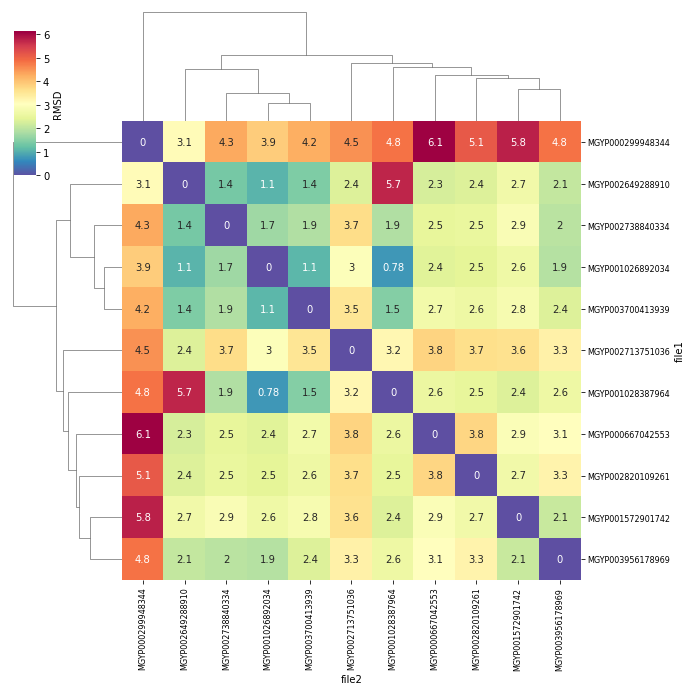

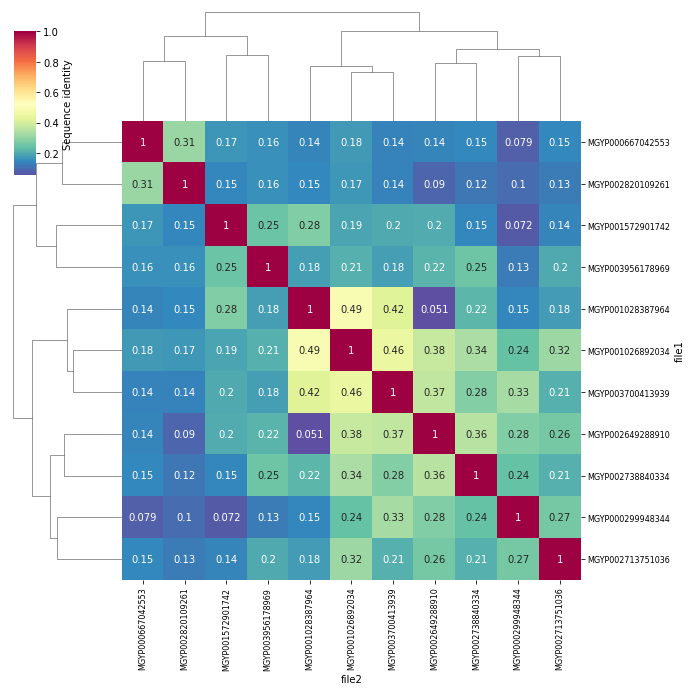

In [60]:
do_clustermap("rmsd", "RMSD")
do_clustermap("seq_ident", "Sequence identity")

In [61]:
# usa una comparacion vizual de ambas 
# lee ambos pdbs y asignalos a una variable cada uno
with open('esm_atlas_proteins/MGYP000299948344.pdb', 'r') as f:
    pdb1 = f.read()
with open('esm_atlas_proteins/MGYP000667042553.pdb', 'r') as f:
    pdb2 = f.read()

# genera la vizualizacion con grid de 1 fila 2 columnas
view = py3Dmol.view(linked=True, viewergrid=(1,2), width=1600, height=800)

# carga las estructruas en distintos paneles y
# colorea las estructrturas para distinguirlas
view.addModel(pdb1,'pdb',viewer=(0,0))
view.setStyle({'cartoon':{'color':'red'}},viewer=(0,0))

view.addModel(pdb2,'pdb',viewer=(0,1))
view.setStyle({'cartoon':{'color':'blue'}},viewer=(0,1))

# despliega las estructruas
view.zoomTo(viewer=(0,0))
view.zoomTo(viewer=(0,1))
view.render()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

https://www.rcsb.org/alignment

# usar ESMFold para plegar una secuencia

In [63]:
# declara una varaible con la info de tu secuencia
my_seq = 'KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRNTDGSTDYGILQINSRWWCNDGRTPGSRNLCNIPCSALLSSDITASVNCAKKIVSDGNGMNAWVAWRNRCKGTDVQAWIRGCRL'

# usa la "API" de ESMFold para predecir la estructrua
! curl -X POST --data {my_seq} https://api.esmatlas.com/foldSequence/v1/pdb > my_seq.pdb

# enlista la estructura e imprime su head y tail 
! ls -lh my_seq.pdb && head my_seq.pdb && tail my_seq.pdb

curl: /usr/local/lib/libcurl.so.4: no version information available (required by curl)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 82629  100 82500  100   129  63532     99  0:00:01  0:00:01 --:--:-- 63658
-rw-r--r-- 1 root root 81K Feb 11 01:09 my_seq.pdb
HEADER                                            18-OCT-22                     
TITLE     ESMFOLD V1 PREDICTION FOR INPUT
REMARK   1                                                                      
REMARK   1 REFERENCE 1                                                          
REMARK   1  AUTH   ZEMING LIN, HALIL AKIN, ROSHAN RAO, BRIAN HIE, ZHONGKAI ZHU,
REMARK   1  AUTH 2 WENTING LU, NIKITA SMETANIN, ROBERT VERKUIL, ORI KABELI,
REMARK   1  AUTH 3 YANIV SHMUELI, ALLAN DOS SANTOS COSTA,
REMARK   1  AUTH 4 MARYAM FAZEL-ZARANDI, TOM SERCU, SALVATORE CANDIDO,
REMARK   1  AUTH 5 ALEXANDER RIVES
REMARK   1  TITL   E

In [64]:
# usa py3Dmol para ver el .pdb 
with open('my_seq.pdb', 'r') as f:
    pdb = f.read()

# Crea una vista 3D de la proteína
view = py3Dmol.view()
view.addModel(pdb, 'pdb')
view.setStyle({'cartoon': {'color': 'spectrum'}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol